## Import necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the data set

In [4]:
df = pd.read_csv("laptopData.csv")

In [5]:
## Summary statistics for numeric columns

In [6]:
df_Stats_Numeric = df.describe ( )
df_Stats_Numeric

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


## Summary statistics for non-numeric columns

In [7]:
df_Stats_Non_Numeric = df.describe ( exclude = np.number )
df_Stats_Non_Numeric

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
unique,19,6,25,40,118,10,40,110,9,189
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,290,710,640,495,183,601,401,271,1047,111


## Checking the size of the DataFrame

In [8]:
df.shape

(1303, 12)

## Concise summary

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


## Display the first few rows of the dataset

In [10]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Data Cleaning And Preprocessing

In [11]:
#checking for duplicates
df.duplicated().sum()  

np.int64(29)

In [12]:
# dropping duplicates
df = df.drop_duplicates()

In [13]:
# checking whether duplicates are dropped
df.duplicated().sum()  

np.int64(0)

In [14]:
# Check for missing values
df.isnull().sum()

Unnamed: 0          1
Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [15]:
# Drop rows with missing values
df = df.dropna()

In [16]:
# Check whether missing values are dropped
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [17]:
# Drop the unnamed column ,axis=1
df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df.shape

(1273, 11)

In [19]:
# checking whether the unnamed column is dropped
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## PRICE

Text(0.5, 1.0, 'Distribution of price')

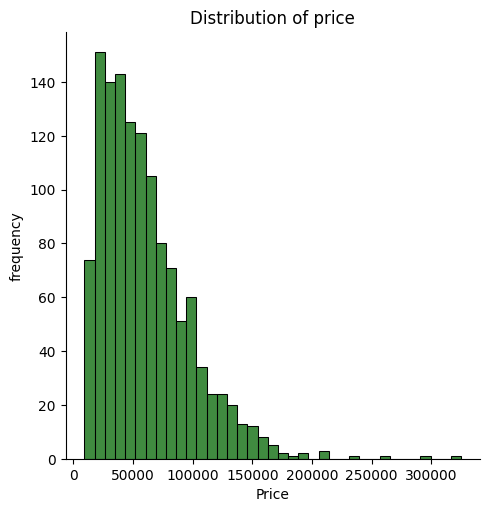

In [20]:
#Distribution of Price 
sns.displot(df['Price'], color='darkgreen')
plt.ylabel('frequency')
plt.title('Distribution of price')

## TYPENAME

In [21]:
df.TypeName.value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

Distribution of Number of laptops and Type

Text(0.5, 1.0, 'Distribution of Number of laptops and Type')

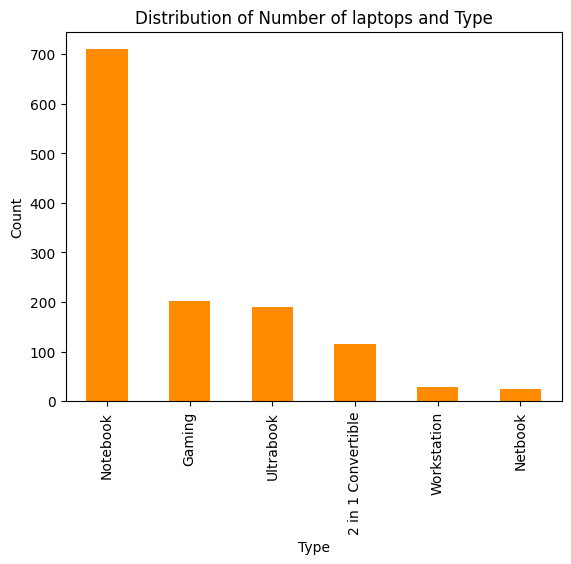

In [22]:
type=df['TypeName'].value_counts().plot(kind='bar', color='darkorange')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Number of laptops and Type')

Distribution of Average Price and Laptop Type

C:\Users\Dell\AppData\Local\Temp\ipykernel_11728\1134076912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['TypeName'], y=df['Price'],palette='viridis')


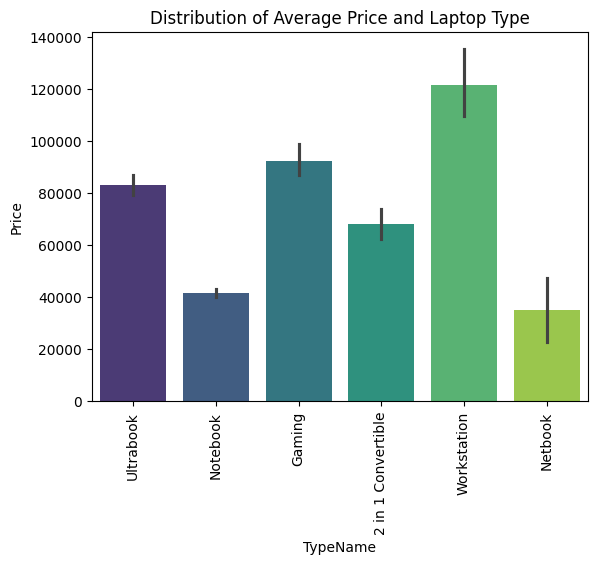

In [23]:
sns.barplot(x=df['TypeName'], y=df['Price'],palette='viridis')
plt.xticks(rotation='vertical')
plt.title("Distribution of Average Price and Laptop Type")
plt.show()


## INCHES

In [24]:
df.Inches.value_counts()

Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
10.1      3
35.6      3
13        2
24        2
18.4      1
27.3      1
25.6      1
33.5      1
?         1
17        1
31.6      1
14.1      1
11.3      1
Name: count, dtype: int64

In [25]:
df = df[~df['Inches'].str.contains(r'\?', regex=True)]

In [26]:
df["Inches"]=df["Inches"].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1272 non-null   object 
 1   TypeName          1272 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1272 non-null   object 
 4   Cpu               1272 non-null   object 
 5   Ram               1272 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1272 non-null   object 
 8   OpSys             1272 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1272 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.2+ KB


Scatter Plot of Inches X Price Visualizes the relationship between screen size and price

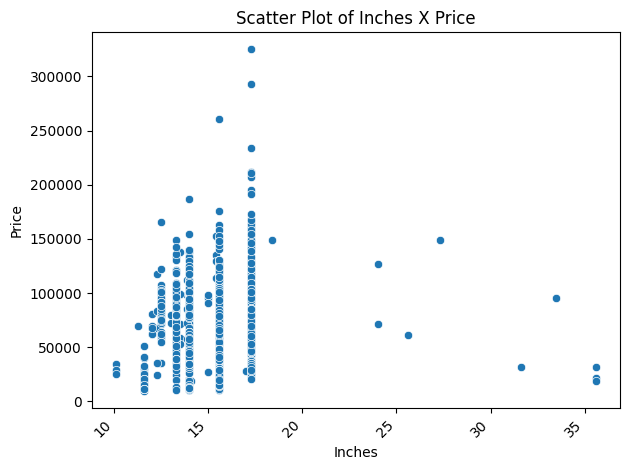

In [28]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

# Set the title
plt.title('Scatter Plot of Inches X Price')

# Increase the spacing between x-ticks by specifying the frequency and optionally rotating them
plt.xticks(rotation=45, ha='right')  # Rotate the x-tick labels for better spacing
plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()

Screen Size and laptop Frequency Distribution

Text(0.5, 1.0, 'Screen Size and laptop Frequency Distribution')

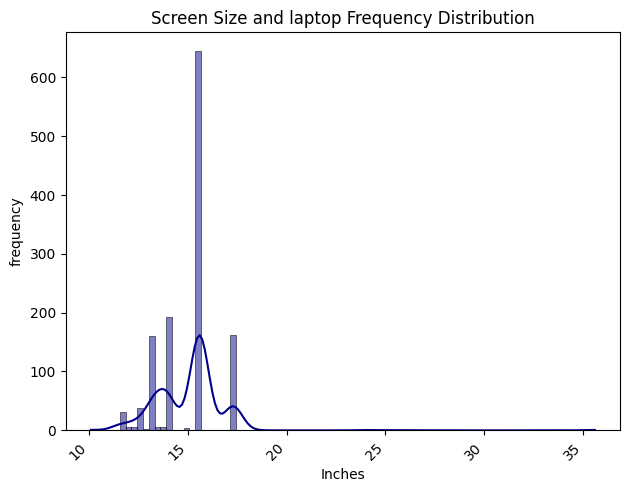

In [29]:
sns.histplot(df['Inches'], kde=True, color='darkblue')

plt.xticks(rotation=45, ha='right')  # Rotate the x-tick labels for better spacing
plt.tight_layout()  # Adjust layout to prevent label overlap

plt.ylabel('frequency')
plt.title('Screen Size and laptop Frequency Distribution')

## RAM

In [30]:
df.Ram.value_counts()

Ram
8GB     600
4GB     367
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

Average price for each RAM size

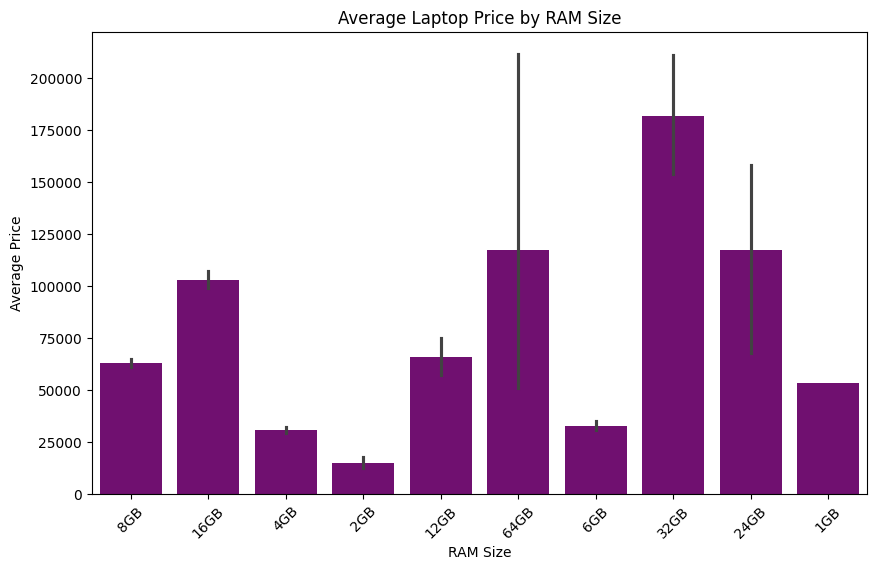

In [31]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.barplot(x='Ram', y='Price', data=df,color='purple' ,estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by RAM Size')
plt.xlabel('RAM Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


In [32]:
df["Ram"]=df["Ram"].str[:-2]

In [33]:
df["Ram"]=df["Ram"].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1272 non-null   object 
 1   TypeName          1272 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1272 non-null   object 
 4   Cpu               1272 non-null   object 
 5   Ram               1272 non-null   int64  
 6   Memory            1272 non-null   object 
 7   Gpu               1272 non-null   object 
 8   OpSys             1272 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1272 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 119.2+ KB


## OPSYS

In [35]:
df.OpSys.value_counts()

OpSys
Windows 10      1046
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

Bar plot of average price by Operating System

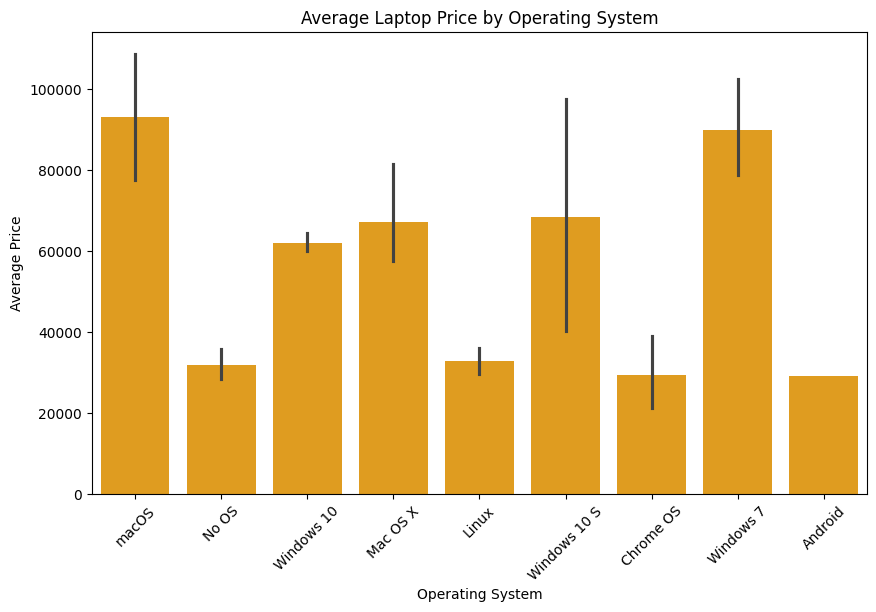

In [36]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.barplot(x='OpSys', y='Price', data=df,color='orange', estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


## GPU

In [37]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [38]:
df['Gpu Brand'] = df['Gpu'].str.split(" ").apply(lambda x: x[0])

In [39]:
df=df.drop("Gpu",axis=1)

## COMPANY

In [40]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

Total Laptops for Each Company

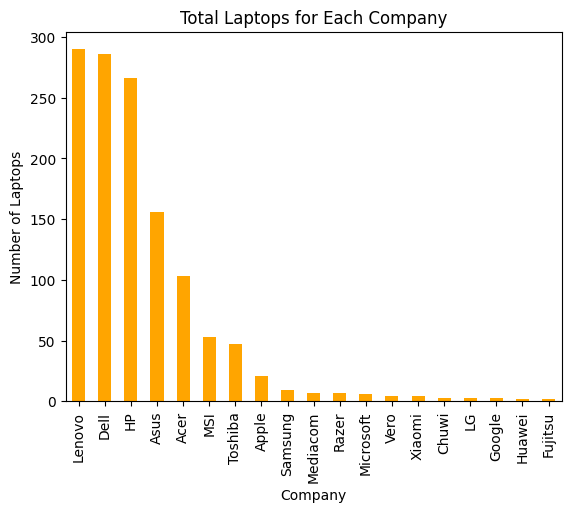

In [41]:
df['Company'].value_counts().plot(kind='bar', color='orange')

# Add title and labels
plt.title('Total Laptops for Each Company')
plt.xlabel('Company')
plt.ylabel('Number of Laptops')

# Show the plot
plt.show()


Average Price of Laptop for each company

C:\Users\Dell\AppData\Local\Temp\ipykernel_11728\3721033974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Company'], y=df['Price'], palette='viridis')


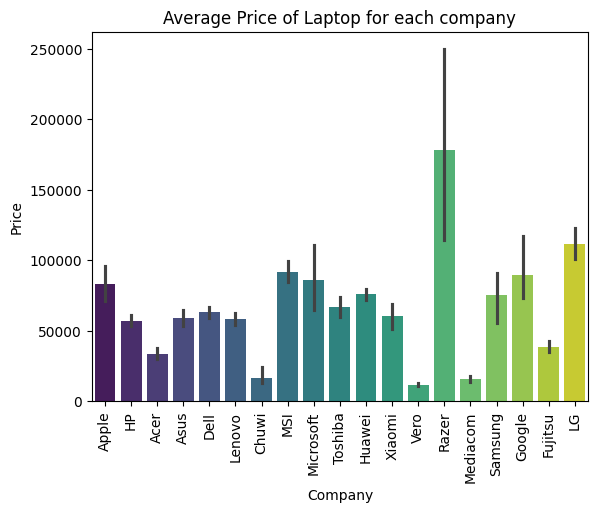

In [42]:
sns.barplot(x=df['Company'], y=df['Price'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Price of Laptop for each company')

plt.show()


## SCREEN RESOLUTION

Splitting Screen Resolution to Screen Width and Screen Height

In [43]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                494
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [44]:
df["ScreenResolution"]=df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

#store the splitted values in width and height
df["ScreenWidth"]=df.ScreenResolution.str.split("x").apply(lambda x:x[0])
df["ScreenHeight"]=df.ScreenResolution.str.split("x").apply(lambda x:x[1])

#drop the screenresoultion since values divided among width and height
df=df.drop("ScreenResolution",axis=1)

In [45]:
df["ScreenHeight"]=df["ScreenHeight"].astype(int)
df["ScreenWidth"]=df["ScreenWidth"].astype(int)

Average price by ScreenWidth

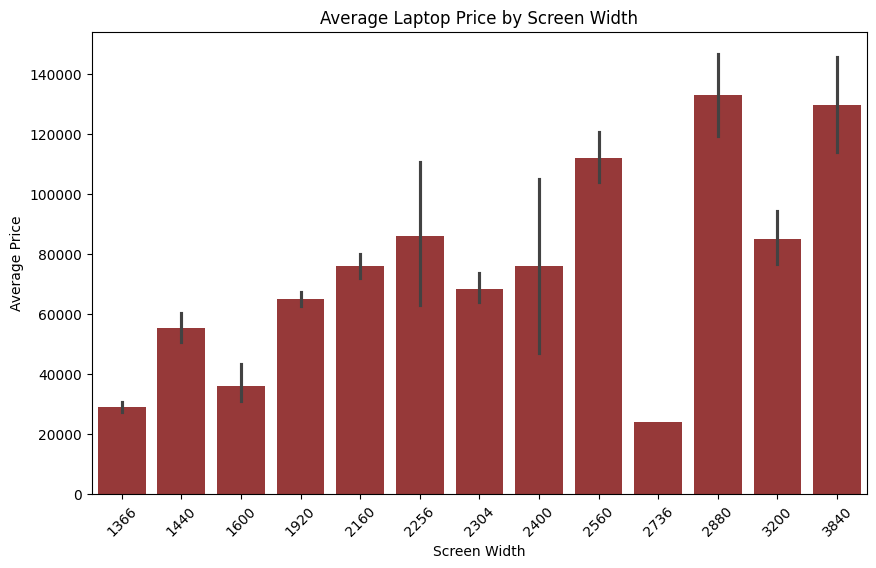

In [46]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for readability
sns.barplot(x='ScreenWidth', y='Price', data=df,color='brown', estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by Screen Width')
plt.xlabel('Screen Width')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


 Bar plot of average price by ScreenHeight

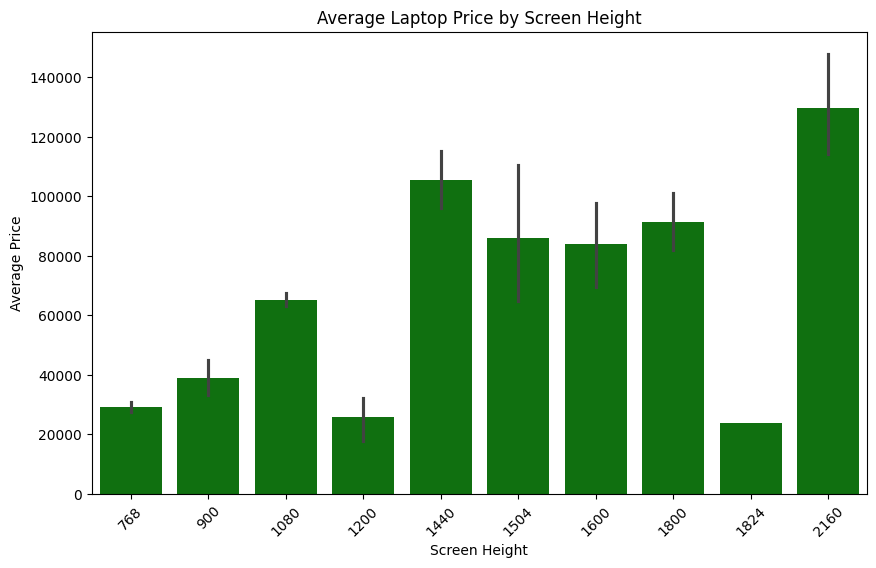

In [47]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.barplot(x='ScreenHeight', y='Price', data=df,color='green', estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by Screen Height')
plt.xlabel('Screen Height')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()

## CPU

Splitting CPU Based on Brand and Frequency

In [48]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      141
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1272 non-null   object 
 1   TypeName      1272 non-null   object 
 2   Inches        1272 non-null   float64
 3   Cpu           1272 non-null   object 
 4   Ram           1272 non-null   int64  
 5   Memory        1272 non-null   object 
 6   OpSys         1272 non-null   object 
 7   Weight        1272 non-null   object 
 8   Price         1272 non-null   float64
 9   Gpu Brand     1272 non-null   object 
 10  ScreenWidth   1272 non-null   int64  
 11  ScreenHeight  1272 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 129.2+ KB


In [50]:
# 1st part of the cpu is assigned as brand and the last part is assigned as freq
df["CPU_Brand"]=df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU_Frequency"]=df.Cpu.str.split(" ").apply(lambda x: x[-1])

#drop cpu since needed value divided amoung brand and frequency
df=df.drop("Cpu",axis=1)

In [51]:
df["CPU_Frequency"]=df["CPU_Frequency"].str[:-3]

In [52]:
df["CPU_Frequency"]=df["CPU_Frequency"].astype(float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1272 non-null   object 
 1   TypeName       1272 non-null   object 
 2   Inches         1272 non-null   float64
 3   Ram            1272 non-null   int64  
 4   Memory         1272 non-null   object 
 5   OpSys          1272 non-null   object 
 6   Weight         1272 non-null   object 
 7   Price          1272 non-null   float64
 8   Gpu Brand      1272 non-null   object 
 9   ScreenWidth    1272 non-null   int64  
 10  ScreenHeight   1272 non-null   int64  
 11  CPU_Brand      1272 non-null   object 
 12  CPU_Frequency  1272 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 139.1+ KB


Average Laptop Price by CPU Brand

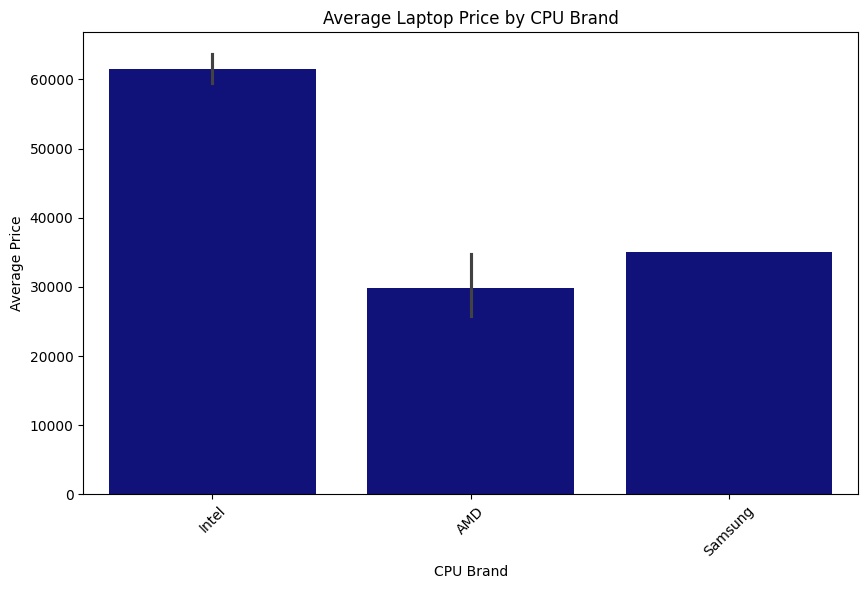

In [54]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for readability
sns.barplot(x='CPU_Brand', y='Price', data=df,color='darkblue', estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


Average Laptop Price by CPU Frequency

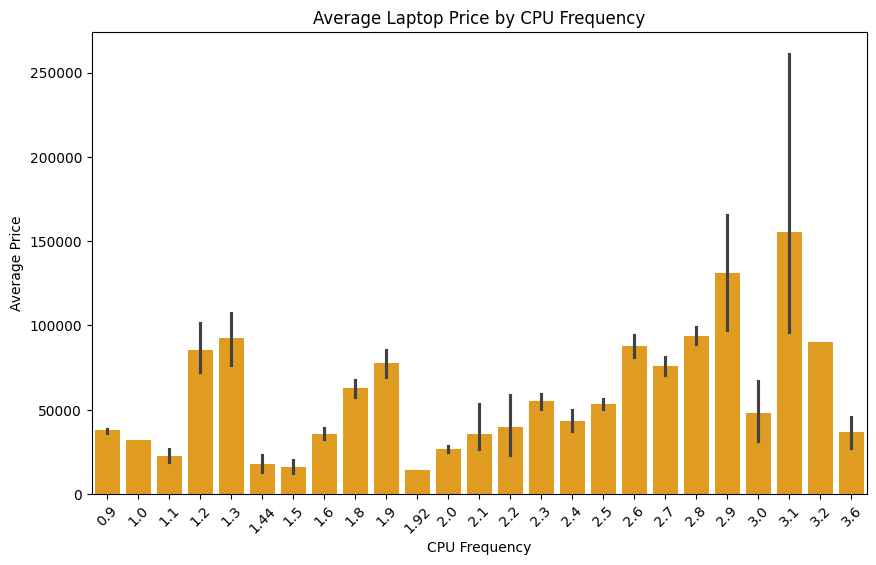

In [55]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for readability
sns.barplot(x='CPU_Frequency', y='Price',color='orange', data=df, estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by CPU Frequency')
plt.xlabel('CPU Frequency')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


## MEMORY

Extract Different Types of Storage from the 'Memory' Column

In [56]:
df.Memory.value_counts()

Memory
256GB SSD                        400
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

In [57]:
df = df[~df['Memory'].str.contains(r'\?', regex=True)]

In [58]:
df.Memory.value_counts()

Memory
256GB SSD                        400
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [59]:
import pandas as pd
import re

# Function to clean the memory details
def clean_memory(memory):
    if isinstance(memory, str):  # Ensure the input is a string
        memory = memory.lower()  # Lowercase all for uniformity
        memory = memory.replace('flash storage', 'flashstorage')  # Join 'flash storage' into one word

        # Regular expression to capture the amount and type of memory
        memory_units = re.findall(r'(\d+)(gb|tb)\s*(ssd|flashstorage|hdd|hybrid)', memory)

        # Dictionary to store the converted values
        memory_dict = {'ssd': 0, 'flashstorage': 0, 'hdd': 0, 'hybrid': 0}

        for value, unit, memory_type in memory_units:
            # Convert all to GB (1TB = 1024GB)
            if unit == 'tb':
                value_in_gb = int(value) * 1024
            else:
                value_in_gb = int(value)

            # Add the value to the respective memory type
            memory_dict[memory_type] += value_in_gb

        return pd.Series(memory_dict)
    else:
        # Return 0 for all columns if the value is not a string
        return pd.Series({'ssd': 0, 'flashstorage': 0, 'hdd': 0, 'hybrid': 0})

# Apply the cleaning function to the 'Memory' column
df_cleaned = df['Memory'].apply(clean_memory)

# Concatenate the original DataFrame with the cleaned memory columns
df = pd.concat([df, df_cleaned], axis=1)

# Display the final DataFrame
print(df)

     Company            TypeName  Inches  Ram               Memory  \
0      Apple           Ultrabook    13.3    8            128GB SSD   
1      Apple           Ultrabook    13.3    8  128GB Flash Storage   
2         HP            Notebook    15.6    8            256GB SSD   
3      Apple           Ultrabook    15.4   16            512GB SSD   
4      Apple           Ultrabook    13.3    8            256GB SSD   
...      ...                 ...     ...  ...                  ...   
1298  Lenovo  2 in 1 Convertible    14.0    4            128GB SSD   
1299  Lenovo  2 in 1 Convertible    13.3   16            512GB SSD   
1300  Lenovo            Notebook    14.0    2   64GB Flash Storage   
1301      HP            Notebook    15.6    6              1TB HDD   
1302    Asus            Notebook    15.6    4            500GB HDD   

           OpSys  Weight        Price Gpu Brand  ScreenWidth  ScreenHeight  \
0          macOS  1.37kg   71378.6832     Intel         2560          1600   
1  

In [60]:
df=df.drop("Memory",axis=1)

In [61]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Gpu Brand,ScreenWidth,ScreenHeight,CPU_Brand,CPU_Frequency,ssd,flashstorage,hdd,hybrid
0,Apple,Ultrabook,13.3,8,macOS,1.37kg,71378.6832,Intel,2560,1600,Intel,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,macOS,1.34kg,47895.5232,Intel,1440,900,Intel,1.8,0,128,0,0
2,HP,Notebook,15.6,8,No OS,1.86kg,30636.0000,Intel,1920,1080,Intel,2.5,256,0,0,0
3,Apple,Ultrabook,15.4,16,macOS,1.83kg,135195.3360,AMD,2880,1800,Intel,2.7,512,0,0,0
4,Apple,Ultrabook,13.3,8,macOS,1.37kg,96095.8080,Intel,2560,1600,Intel,3.1,256,0,0,0


Bar plot for average price by SSD


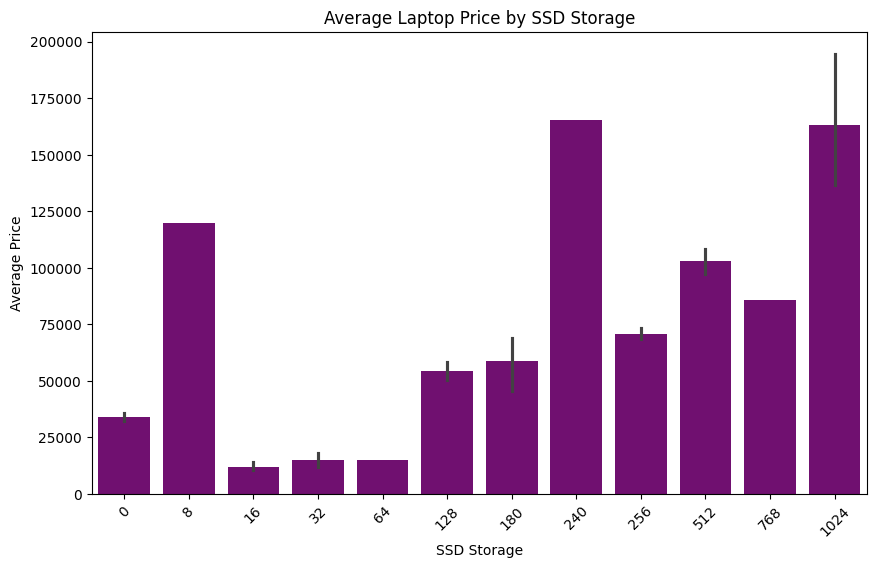

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ssd', y='Price', data=df, color='purple',estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by SSD Storage')
plt.xlabel('SSD Storage')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()


Bar plot for average price by HDD

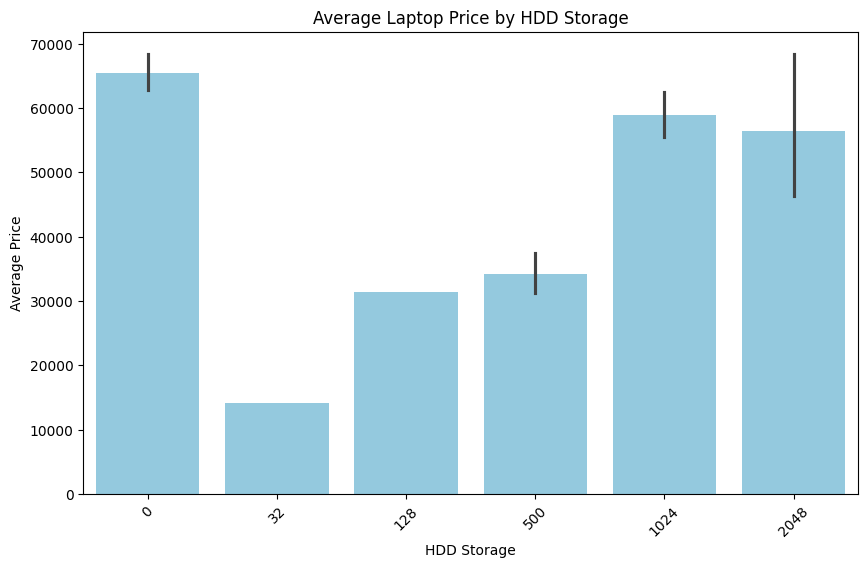

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hdd', y='Price', data=df,color='skyblue', estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by HDD Storage')
plt.xlabel('HDD Storage')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()


Bar plot for average price by Flash Storage

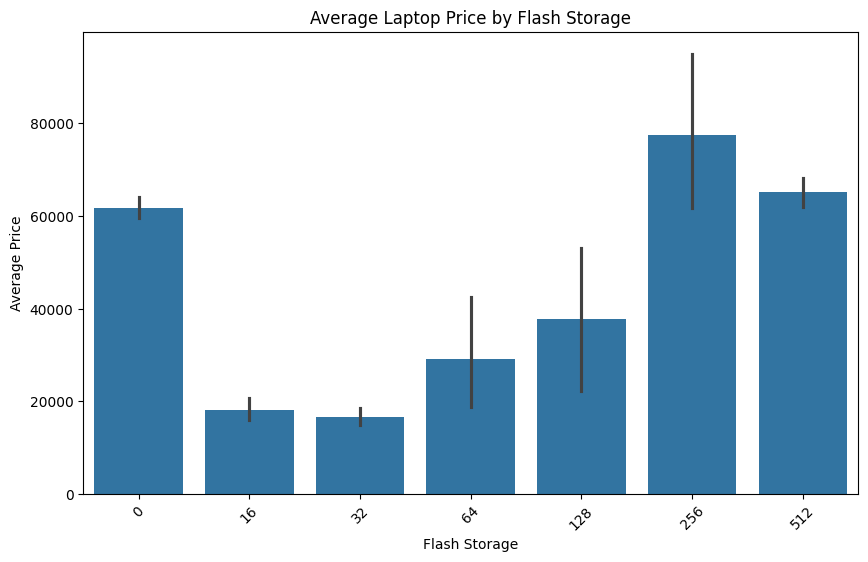

In [64]:

plt.figure(figsize=(10, 6))
sns.barplot(x='flashstorage', y='Price', data=df, estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by Flash Storage')
plt.xlabel('Flash Storage')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()


Bar plot for average price by Hybrid Storage

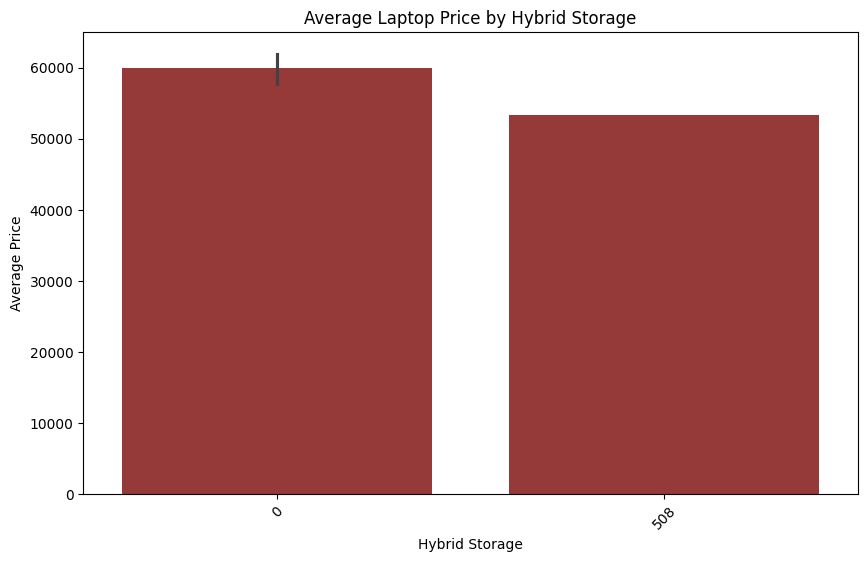

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hybrid', y='Price', data=df, color='brown',estimator=np.mean)

# Add title and labels
plt.title('Average Laptop Price by Hybrid Storage')
plt.xlabel('Hybrid Storage')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()


## WEIGHT

In [66]:
df["Weight"].value_counts()

Weight
2.2kg      111
2.1kg       57
2.4kg       43
2.3kg       40
2.5kg       37
          ... 
3.52kg       1
2.21kg       1
2.191kg      1
2.34kg       1
4.0kg        1
Name: count, Length: 189, dtype: int64

In [67]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [68]:
df["Weight"]=df["Weight"].str[:-2]

In [69]:
df['Weight'] = df['Weight'].replace('', np.nan)

In [70]:
df = df.dropna(subset=['Weight'])

In [71]:
df['Weight'].value_counts(dropna=False)

Weight
2.2      111
2.1       57
2.4       43
2.3       40
2.5       37
        ... 
3.52       1
2.21       1
2.191      1
2.34       1
4.0        1
Name: count, Length: 188, dtype: int64

In [72]:
df[ 'Weight'] = df['Weight'].astype('float')

In [73]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Gpu Brand,ScreenWidth,ScreenHeight,CPU_Brand,CPU_Frequency,ssd,flashstorage,hdd,hybrid
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Intel,2560,1600,Intel,2.3,128,0,0,0
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Intel,1440,900,Intel,1.8,0,128,0,0
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Intel,1920,1080,Intel,2.5,256,0,0,0
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,AMD,2880,1800,Intel,2.7,512,0,0,0
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Intel,2560,1600,Intel,3.1,256,0,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1270 non-null   object 
 1   TypeName       1270 non-null   object 
 2   Inches         1270 non-null   float64
 3   Ram            1270 non-null   int64  
 4   OpSys          1270 non-null   object 
 5   Weight         1270 non-null   float64
 6   Price          1270 non-null   float64
 7   Gpu Brand      1270 non-null   object 
 8   ScreenWidth    1270 non-null   int64  
 9   ScreenHeight   1270 non-null   int64  
 10  CPU_Brand      1270 non-null   object 
 11  CPU_Frequency  1270 non-null   float64
 12  ssd            1270 non-null   int64  
 13  flashstorage   1270 non-null   int64  
 14  hdd            1270 non-null   int64  
 15  hybrid         1270 non-null   int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 168.7+ KB


## Label encoding

In [75]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store LabelEncoders for each categorical column
encoders = {}

# Apply Label Encoding to each object-type column and save the encoders
for col in df.columns:
    if df[col].dtype == 'object':  # Use only object columns (categorical)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

# To display the mapping of encoded values to original values for each column
for col, le in encoders.items():
    print(f"Column: {col}")
    for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"{encoded_value} -> {original_value}")
    print("\n")

Column: Company
0 -> Acer
1 -> Apple
2 -> Asus
3 -> Chuwi
4 -> Dell
5 -> Fujitsu
6 -> Google
7 -> HP
8 -> Huawei
9 -> LG
10 -> Lenovo
11 -> MSI
12 -> Mediacom
13 -> Microsoft
14 -> Razer
15 -> Samsung
16 -> Toshiba
17 -> Vero
18 -> Xiaomi


Column: TypeName
0 -> 2 in 1 Convertible
1 -> Gaming
2 -> Netbook
3 -> Notebook
4 -> Ultrabook
5 -> Workstation


Column: OpSys
0 -> Android
1 -> Chrome OS
2 -> Linux
3 -> Mac OS X
4 -> No OS
5 -> Windows 10
6 -> Windows 10 S
7 -> Windows 7
8 -> macOS


Column: Gpu Brand
0 -> AMD
1 -> ARM
2 -> Intel
3 -> Nvidia


Column: CPU_Brand
0 -> AMD
1 -> Intel
2 -> Samsung




## Encode categorical variables using Label Encoding

In [76]:
df_encoded = df.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.dtype == 'object' else col)
df = df_encoded

In [77]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Gpu Brand,ScreenWidth,ScreenHeight,CPU_Brand,CPU_Frequency,ssd,flashstorage,hdd,hybrid
0,1,4,13.3,8,8,1.37,71378.6832,2,2560,1600,1,2.3,128,0,0,0
1,1,4,13.3,8,8,1.34,47895.5232,2,1440,900,1,1.8,0,128,0,0
2,7,3,15.6,8,4,1.86,30636.0000,2,1920,1080,1,2.5,256,0,0,0
3,1,4,15.4,16,8,1.83,135195.3360,0,2880,1800,1,2.7,512,0,0,0
4,1,4,13.3,8,8,1.37,96095.8080,2,2560,1600,1,3.1,256,0,0,0


## Plot heatmap to visualize correlations

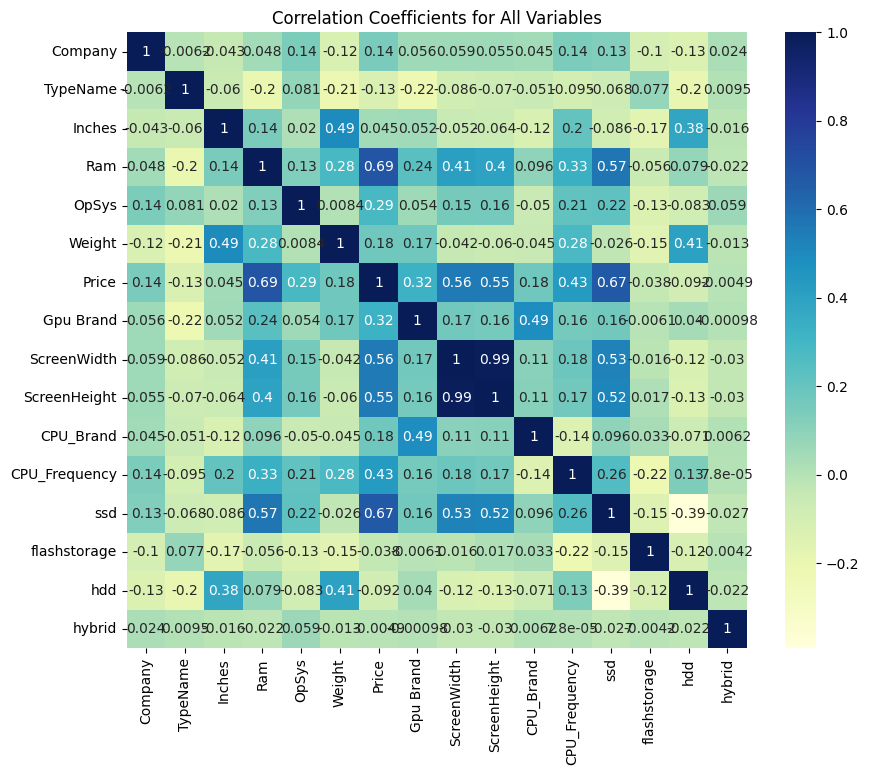

In [78]:
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(df_encoded.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Coefficients for All Variables')
plt.show()

## Define feature set (X) and target variable (y)

In [79]:
# Assuming 'Price' is the column with the laptop price we want to predict
X = df_encoded.drop('Price', axis=1)  # Features
y = df_encoded['Price']  # Target variable
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [80]:
# Initialize the model
model = RandomForestRegressor(random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [81]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2_random_forest = r2_score(y_test, y_test_pred)

# Output the performance metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2_random_forest:.2f}")


Performance Metrics:
Mean Absolute Error (MAE): 8346.71
Mean Squared Error (MSE): 167388813.63
R-squared (R²): 0.85


Actual vs Predicted Prices of RandomForestRegressor

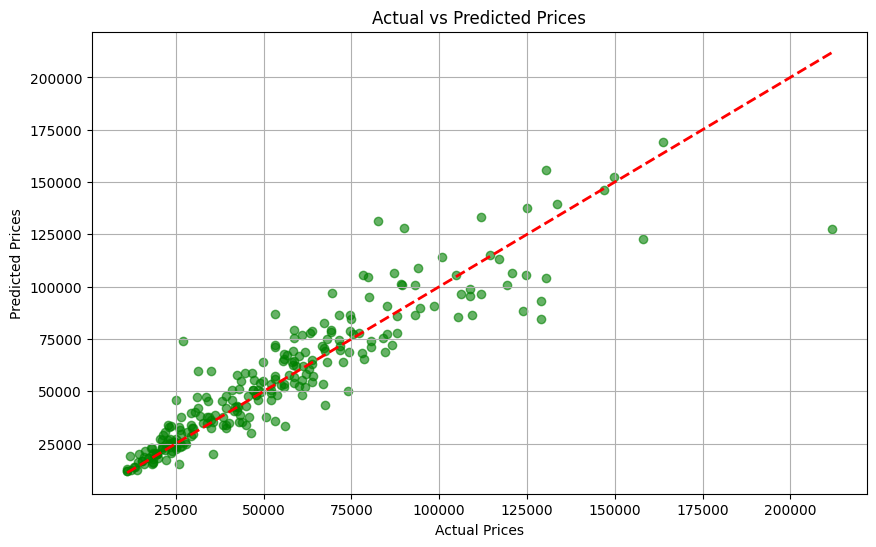

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

## Gradient Boosting Regressor

In [83]:
# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)
# Train the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [84]:
# Predict on the test set
y_test_pred = gb_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2_gradient_boosting = r2_score(y_test, y_test_pred)

# Display performance metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2_gradient_boosting:.2f}")


Performance Metrics:
Mean Absolute Error (MAE): 8883.26
Mean Squared Error (MSE): 181589643.43
R-squared (R²): 0.84


Actual vs Predicted Prices of Gradient Boosting Regressor

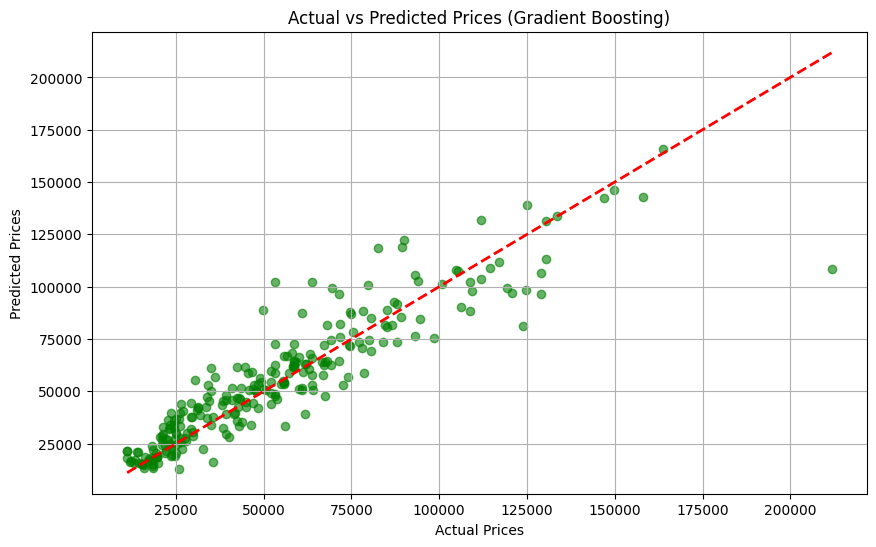

In [85]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

## Linear Regression Model

In [86]:
# Initialize the Linear Regression model
lr_model = LinearRegression()
# Fit the model to the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Predict on the test set
y_test_pred = lr_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2_linear_regression = r2_score(y_test, y_test_pred)

# Display performance metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2_linear_regression:.2f}")


Performance Metrics:
Mean Absolute Error (MAE): 13772.76
Mean Squared Error (MSE): 361467869.00
R-squared (R²): 0.67


Actual vs Predicted Prices of Linear Regression Model

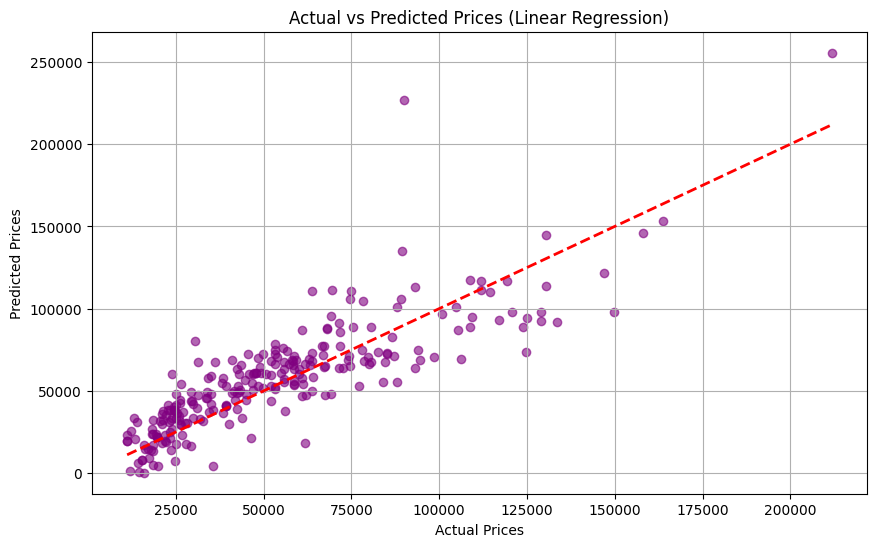

In [88]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

## Decision Tree Regressor

In [89]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
# Fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [90]:
# Predict on the test set
y_test_pred_dt = dt_model.predict(X_test)

# Calculate performance metrics
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)

# Display performance metrics
print("Decision Tree Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R²): {r2_dt:.2f}")


Decision Tree Performance Metrics:
Mean Absolute Error (MAE): 11313.54
Mean Squared Error (MSE): 303853079.46
R-squared (R²): 0.73


Actual vs Predicted Prices of Decision Tree Regressor

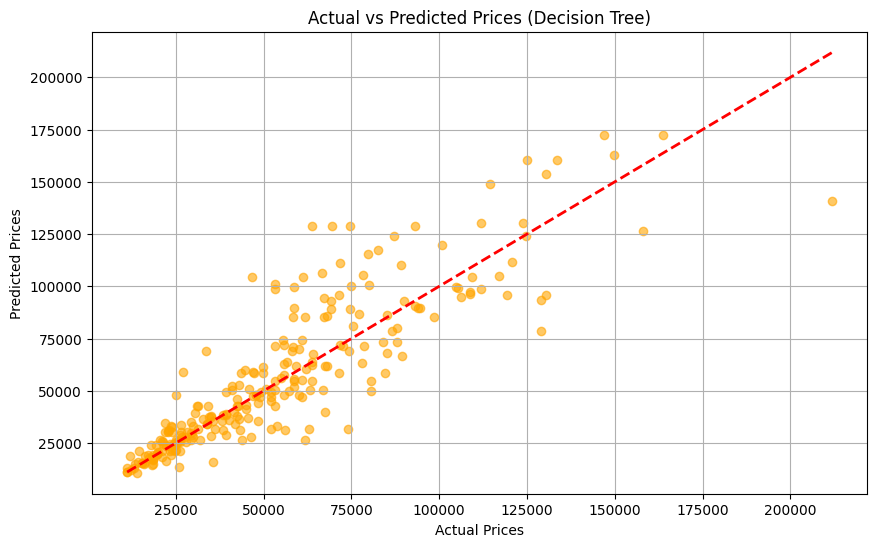

In [91]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

## Support Vector Regressor

In [92]:
# Initialize the Support Vector Regressor
svr_regressor = SVR(kernel='rbf')  
# Fit the model to the training data
svr_regressor.fit(X_train, y_train)

SVR()

In [93]:
# Predict on the test set
y_test_pred_svr = svr_regressor.predict(X_test)

# Calculate performance metrics
mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
mse_svr = mean_squared_error(y_test, y_test_pred_svr)
r2_svr = r2_score(y_test, y_test_pred_svr)

# Display performance metrics
print("SVR Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared (R²): {r2_svr:.2f}")


SVR Performance Metrics:
Mean Absolute Error (MAE): 25628.60
Mean Squared Error (MSE): 1111630917.61
R-squared (R²): 0.00


Actual vs Predicted Prices of Support Vector Regressor

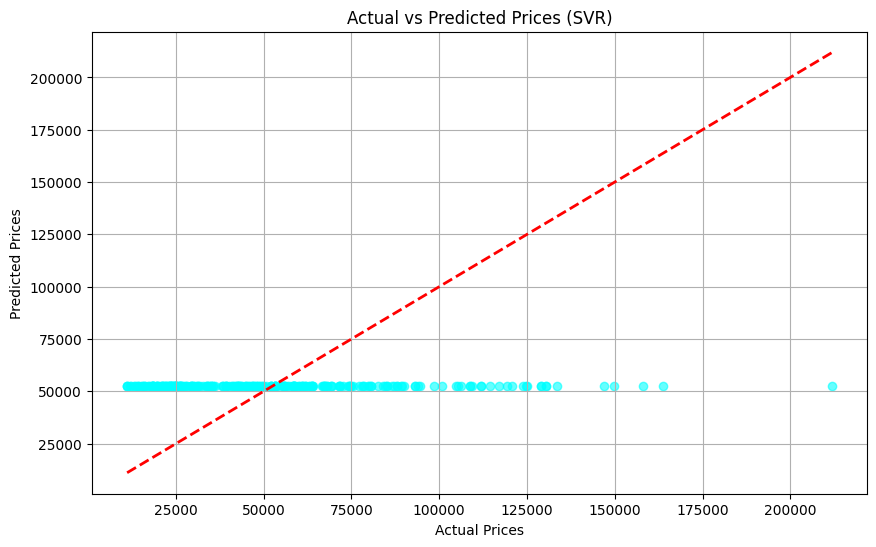

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_svr, alpha=0.6, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.title('Actual vs Predicted Prices (SVR)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

## Model Accuracy Comparison

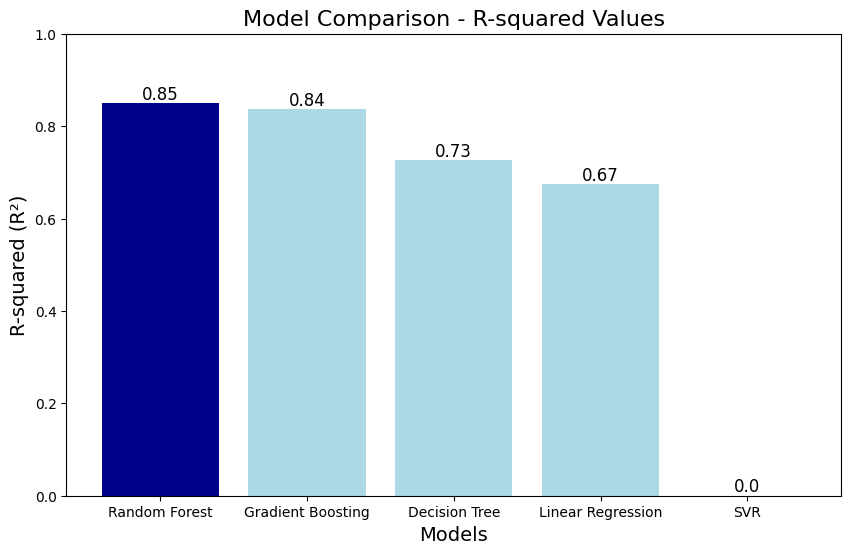

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for each model
model_names = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'Linear Regression', 'SVR']
r_squared_values = [r2_random_forest, r2_gradient_boosting, r2_dt, r2_linear_regression, r2_svr]

# Determine the index of the best model
best_model_index = np.argmax(r_squared_values)

# Set colors: dark blue for the best model, light blue for others
colors = ['lightblue'] * len(model_names)
colors[best_model_index] = 'darkblue'  # Highlight the best model

# Create a bar plot to compare R-squared values
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r_squared_values, color=colors)

# Adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('R-squared (R²)', fontsize=14)
plt.title('Model Comparison - R-squared Values', fontsize=16)

# Adding the R² values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)  # Set the y-axis limits (since R² ranges from 0 to 1)
plt.show()


In [96]:
import pickle
#load the dataframe
pickle.dump(df,open('lapdf.pkl','wb'))
#load the model
pickle.dump(model,open('rd_model.pkl','wb'))

In [97]:
print(df.columns)

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'Gpu Brand', 'ScreenWidth', 'ScreenHeight', 'CPU_Brand',
       'CPU_Frequency', 'ssd', 'flashstorage', 'hdd', 'hybrid'],
      dtype='object')


In [98]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Gpu Brand,ScreenWidth,ScreenHeight,CPU_Brand,CPU_Frequency,ssd,flashstorage,hdd,hybrid
0,1,4,13.3,8,8,1.37,71378.6832,2,2560,1600,1,2.3,128,0,0,0
1,1,4,13.3,8,8,1.34,47895.5232,2,1440,900,1,1.8,0,128,0,0
2,7,3,15.6,8,4,1.86,30636.0000,2,1920,1080,1,2.5,256,0,0,0
3,1,4,15.4,16,8,1.83,135195.3360,0,2880,1800,1,2.7,512,0,0,0
4,1,4,13.3,8,8,1.37,96095.8080,2,2560,1600,1,3.1,256,0,0,0


In [99]:
# Assuming encoders is a dictionary where each column has its LabelEncoder stored
for col, le in encoders.items():
    print(f"Original mapping for column: {col}")
    for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"{encoded_value} -> {original_value}")
    print("\n")

Original mapping for column: Company
0 -> Acer
1 -> Apple
2 -> Asus
3 -> Chuwi
4 -> Dell
5 -> Fujitsu
6 -> Google
7 -> HP
8 -> Huawei
9 -> LG
10 -> Lenovo
11 -> MSI
12 -> Mediacom
13 -> Microsoft
14 -> Razer
15 -> Samsung
16 -> Toshiba
17 -> Vero
18 -> Xiaomi


Original mapping for column: TypeName
0 -> 2 in 1 Convertible
1 -> Gaming
2 -> Netbook
3 -> Notebook
4 -> Ultrabook
5 -> Workstation


Original mapping for column: OpSys
0 -> Android
1 -> Chrome OS
2 -> Linux
3 -> Mac OS X
4 -> No OS
5 -> Windows 10
6 -> Windows 10 S
7 -> Windows 7
8 -> macOS


Original mapping for column: Gpu Brand
0 -> AMD
1 -> ARM
2 -> Intel
3 -> Nvidia


Original mapping for column: CPU_Brand
0 -> AMD
1 -> Intel
2 -> Samsung


